In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

In [3]:
import numpy as np
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


In [5]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

In [6]:
model = tf.keras.Sequential([l0])

In [7]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])

In [8]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [9]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


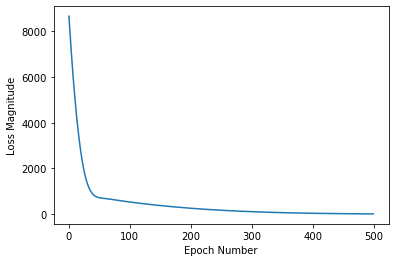

In [10]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [11]:
print(model.predict([100.0]))

[[211.2728]]


In [12]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[0.7386235]], dtype=float32), array([0.], dtype=float32)]


In [13]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[211.74742]]
Model predicts that 100 degrees Celsius is: [[211.74742]] degrees Fahrenheit
These are the l0 variables: [array([[-0.13341352, -0.781058  ,  0.36735117, -0.525238  ]],
      dtype=float32), array([-1.5241266, -4.129717 , -2.7777748, -4.279964 ], dtype=float32)]
These are the l1 variables: [array([[ 0.2642746 , -1.0174707 , -0.19541351,  0.51319385],
       [-1.202732  , -0.5367852 ,  1.3896618 , -0.785533  ],
       [-1.1193027 , -0.58137983,  0.3138616 , -1.2917764 ],
       [-0.146887  , -0.5729082 ,  1.701934  , -0.78646326]],
      dtype=float32), array([ 0.21906336,  3.9187236 , -2.8670917 ,  3.4257019 ], dtype=float32)]
These are the l2 variables: [array([[ 0.03095705],
       [ 0.9355326 ],
       [-0.4476976 ],
       [ 0.73716944]], dtype=float32), array([3.8556042], dtype=float32)]


In [14]:
print(model.predict([100.0]))

[[211.74742]]


In [15]:
exit()